In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as smp
import statsmodels.stats.weightstats as stm
import statsmodels.api as sm
import math
from scipy import stats

In [ ]:
#1.prepare the data
df1 = pd.read_csv('dataset1.csv')
print(df1.head())
print(df1.isnull().sum() )
print(df1.shape)

df2 = pd.read_csv('dataset2.csv')
print(df2.head())
print(df2.isnull().sum() )
print(df2.shape)


mf = df1['habit'].mode()[0]
print(f"most_frequent is :{mf}")

#fill the missing values with the most_frequent(mf)
df1['habit'] = df1['habit'].fillna(mf)


         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  30/12/2017 

‘’‘**In the data cleaning, `most_frequent is : fast` indicates that `fast` is the most frequent behavior category in the `df1\['habit']` column. To handle missing values ​​(41 NaNs), we use mode imputation to fill missing `habit` values ​​with `fast` to ensure correct analysis. In other words, the most common behavior is used as a replacement for missing values**.’‘’

count    907.000000
mean      11.713134
std       27.644410
min        0.010238
25%        1.000000
50%        4.000000
75%       11.500000
max      443.000000
Name: bat_landing_to_food, dtype: float64

IQR: 10.5

z_score: 1.96

Two-sided 95% CI: 9.91 to 13.51

One-sided (upper) 95% CI: 10.20 to inf
One-sided (lower) 95% CI: -inf to 13.22

Mean latency Risk=0 (Avoidance): 7.12 s
Mean latency Risk=1 (Taking): 16.39 s

Median latency Risk=0: 2.00 s
Median latency Risk=1: 7.00 s

risk
0    458
1    449
Name: count, dtype: int64

risk_precentage: risk
0    50.5
1    49.5
Name: proportion, dtype: float64

95% CI for risk proportion (normal): 0.463 to 0.528

season_risk:risk      0    1  risk_ratio
season                      
0        66   85        0.56
1       392  364        0.48

month_risk:risk     0    1  risk_ratio
month                      
0       12   14        0.54
1       21   12        0.36
2       33   59        0.64
3       16   10        0.38
4      277  221        0.44
5  

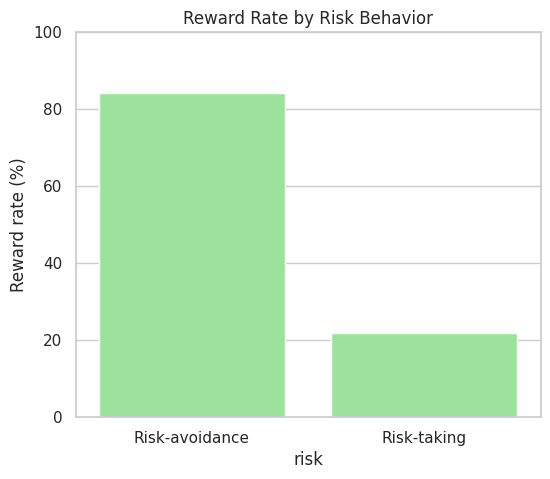

In [ ]:
#2.1 descriptive statistics


# This includes count, mean, std, min, quartiles, and max.
des=df1['bat_landing_to_food'].describe()
print(des)
print()


#interquartile Range (IQR) = Q3 - Q1
# it shows the spread of the middle 50% of the data
IQR = des['75%'] - des['25%']
print(f"IQR: {IQR}")
print()


#calculate sample mean
x_bar = df1['bat_landing_to_food'].mean()
# Sample standard deviation
s = df1['bat_landing_to_food'].std()
#sample size
n = len(df1)


# z-score for 95% confidence level (two-sided)
z_score= st.norm.ppf(0.975)
print(f'z_score: {z_score:.2f}')
print()
#standard error of the mean
std_err =s/math.sqrt(n)

#confidence intervals using statsmodels
# Two-sided 95% CI
ci_low_tw, ci_upp_tw = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="two-sided")
print(f"Two-sided 95% CI: {ci_low_tw:.2f} to {ci_upp_tw:.2f}")
print()


 #One-sided 95% CI (upper bound and lower bound)
ci_low_up, ci_upp_up = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="larger")
print(f"One-sided (upper) 95% CI: {ci_low_up:.2f} to {ci_upp_up:.2f}")
ci_low_down, ci_upp_down = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="smaller")
print(f"One-sided (lower) 95% CI: {ci_low_down:.2f} to {ci_upp_down:.2f}")
print()


#the average hesitation time of the risk-averse group (risk=0)
#and the risk-taking group (risk=1)
meanlr0 = df1[df1['risk'] == 0]['bat_landing_to_food'].mean()
meanlr1 = df1[df1['risk'] == 1]['bat_landing_to_food'].mean()

print(f"Mean latency Risk=0 (Avoidance): {meanlr0:.2f} s")
print(f"Mean latency Risk=1 (Taking): {meanlr1:.2f} s")
print()

# median is also calculated because the data has a skewed distribution.
medianlr0 = df1[df1['risk'] == 0]['bat_landing_to_food'].median()
medianlr1 = df1[df1['risk'] == 1]['bat_landing_to_food'].median()

print(f"Median latency Risk=0: {medianlr0:.2f} s")
print(f"Median latency Risk=1: {medianlr1:.2f} s")
print()


2.2 #risk's frequency and propotion
#count how many time risk =1 and risk =1 occur
risk_count= df1['risk'].value_counts()
print(risk_count)
print()
#convert the counts into percentages
risk_precentage=df1['risk'].value_counts(normalize=True) * 100
print(f'risk_precentage: {risk_precentage.round(2)}')
print()

prop=df1['risk'].sum() #count of risk-taking
total=len(df1) #total number of observations.
conf_lvl=0.95 #confidence level
a=0.05 #signifcent


#Calculate CI for the proportion of risk-taking behaviour
ci_low, ci_upp = smp.proportion_confint(prop, total, alpha=a, method='normal')
print(f"95% CI for risk proportion (normal): {ci_low:.3f} to {ci_upp:.3f}")
print()

#2.3 Microanalysis ， Risk-taking
# this line groups the data by both 'season' and 'risk' and counts the number of occurrences
#for each combination
season_risk = df1.groupby(['season', 'risk']).size().unstack(fill_value=0)
season_risk['risk_ratio'] = season_risk[1] / (season_risk[0]+season_risk[1])
print(f"season_risk:{season_risk.round(2)}")
print()

 #this line groups the data by both 'month' and 'risk' and counts the number of occurrences
#for each combination
month_risk = df1.groupby(['month', 'risk']).size().unstack(fill_value=0)
month_risk['risk_ratio'] = month_risk[1] / (month_risk[0]+month_risk[1])
print(f"month_risk:{month_risk.round(2)}")
print()

# his line counts the occurrences of each unique value in the 'habit' column and prints the counts
#This helps you see the distribution of different bat behaviours in the dataset
print(df1['habit'].value_counts())
print()


#habit_category
valid_habits = ['fast', 'rat', 'pick', 'bat', 'bat_fight', 'rat_bat_fight', 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
df1['habit_category'] = df1['habit'].apply(lambda x: x if x in valid_habits else 'other')

habit_risk = df1.groupby(['habit_category', 'risk']).size().unstack(fill_value=0)
habit_risk['risk_ratio'] = habit_risk[1] / (habit_risk[0] + habit_risk[1])
print(f" habit vs risk :{ habit_risk.round(2)}")
print()
#Reward Rate
reward_rate = df1.groupby('risk')['reward'].mean()
print("\nReward rate by risk:\n", reward_rate.round(2))

plt.figure(figsize=(6,5))
sns.barplot(x=reward_rate.index, y=reward_rate.values*100, color='lightgreen')
plt.xticks([0,1], ['Risk-avoidance', 'Risk-taking'])
plt.ylabel("Reward rate (%)")
plt.title("Reward Rate by Risk Behavior")
plt.ylim(0,100)
plt.show()

‘’‘**Microanalysis revealed that bats' risk-taking behavior is influenced by season, month, and specific behavior type: risk-taking is higher in warm or food-abundant seasons (e.g., season 0 or February/May), while it decreases in winter or when food is scarce. Behaviors associated with mice or competition (e.g., bat, bat_fight, rat) are almost always risky, while stable behaviors (e.g., fast, pick) tend to be safer. However, the probability of reward in risk-taking bats (22%) is much lower than in risk-averse bats (84%), indicating that risk-taking carries a higher risk of failure and that individuals weigh risks and benefits when choosing behaviors’‘’**

In [ ]:
#3.1 r shows the strength and direction of linear relationship
# p-value tests if the correlation is statistically significant
r, p = stats.pearsonr(df2['rat_minutes'], df2['bat_landing_number'])
print(f"correlation r={r:.3f}, p-value ={p:.5f}")


#3.2 it a simple linear regression model: bat_landing_number ~ rat_minutes
# slope tells how much bat landings change per minute of rat presence
# intercept is the expected bat landings when rat_minutes = 0
#  R² measures how much variation in bat landings is explained by rat_minutes
# p-value tests if the slope is significantly different from zero
slope, intercept, r_val, p_val, stderr = stats.linregress(df2['rat_minutes'], df2['bat_landing_number'])
print(f"regression equation: bat_landing_number = {slope:.3f}*rat_minutes + {intercept:.2f}")
print(f"R²={r_val**2:.3f}, p-value={p_val:.5f}")


#3.3 Prepare data for multiple linear regression (OLS)
X = df2[['rat_minutes','hours_after_sunset','food_availability']].fillna(0)
X = sm.add_constant(X)
y = df2['bat_landing_number']

# 3. 4 Fit OLS model
# This allows us to see the independent effect of rat_minutes controlling for other variables
# model.summary() outputs coefficients, R², p-values, Adj. R-squared, etc.
model = sm.OLS(y, X).fit()
print(model.summary())


correlation r=-0.146, p-value =0.00000
regression equation: bat_landing_number = -0.551*rat_minutes + 33.18
R²=0.021, p-value=0.00000
                            OLS Regression Results                            
Dep. Variable:     bat_landing_number   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     27.33
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           2.43e-17
Time:                        10:06:39   Log-Likelihood:                -9856.8
No. Observations:                2123   AIC:                         1.972e+04
Df Residuals:                    2119   BIC:                         1.974e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025  

**MACRO ‘’‘Regression analysis showed that, in a simple linear regression, for every 1-minute increase in rat presence, the number of bat landings decreased by approximately 0.551, with a significant slope (p < 0.001), although the model had low explanatory power (R² = 0.021). In a multiple linear regression, even after controlling for nighttime and food availability, the presence of rats still significantly reduced the number of bat landings (coef = -0.487, p < 0.001), and later nighttime also reduced bat landings (coef = -0.949, p < 0.001). However, the effect of food availability was not significant (p = 0.456). Overall, even after accounting for other factors, the presence of rats still had a significant negative impact on bat colony behavior, and the model trend was reliable, but the explanatory power was limited (R² = 0.037).’‘’**

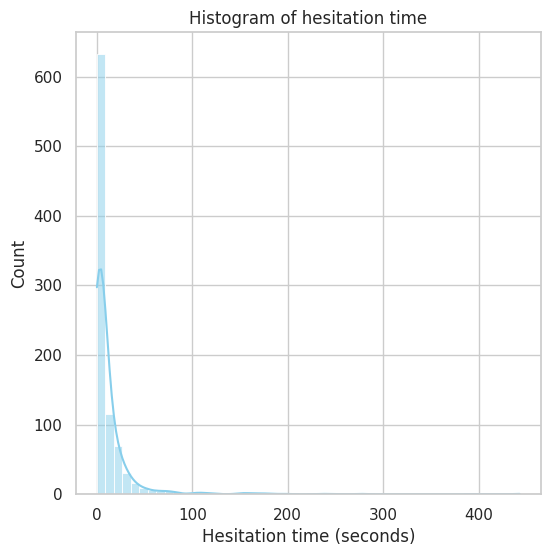

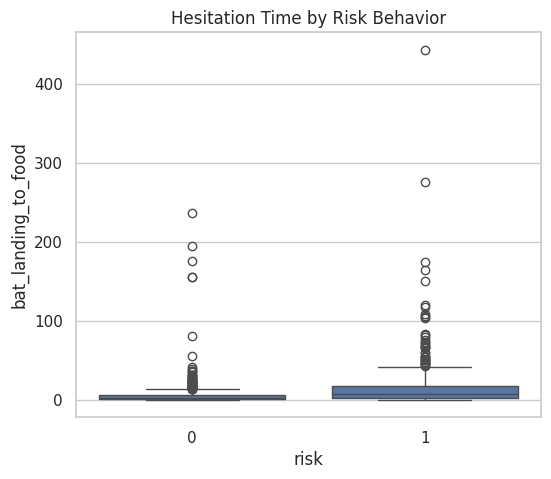

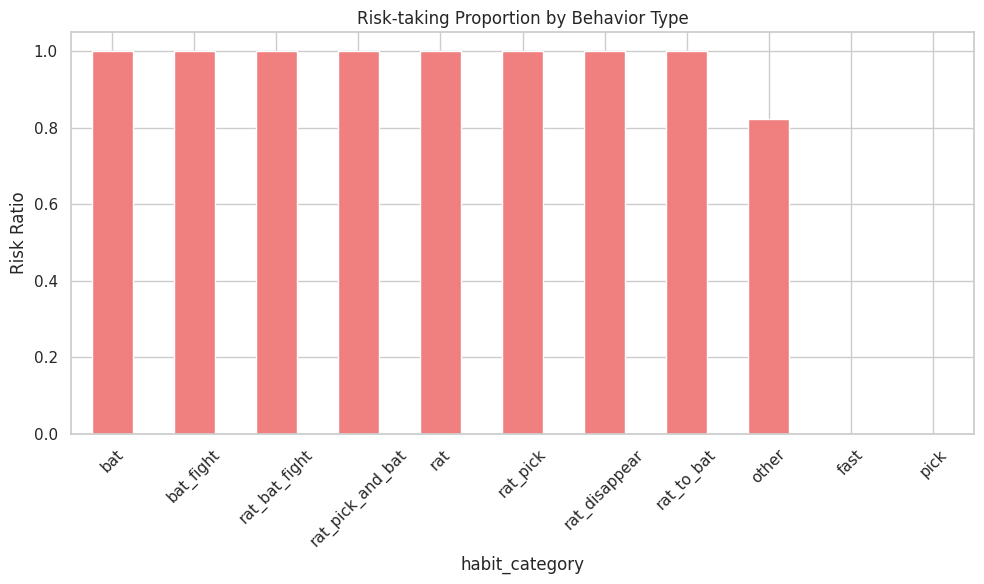

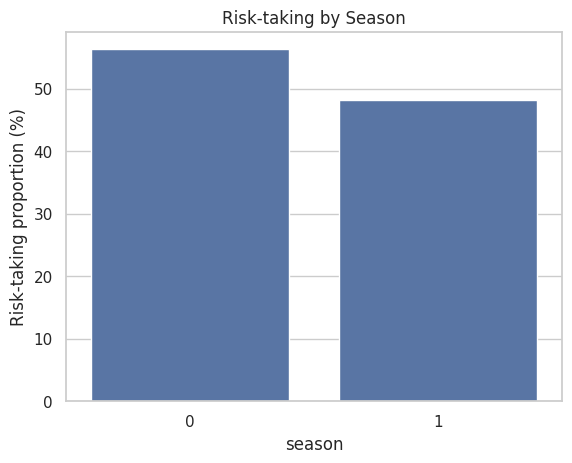

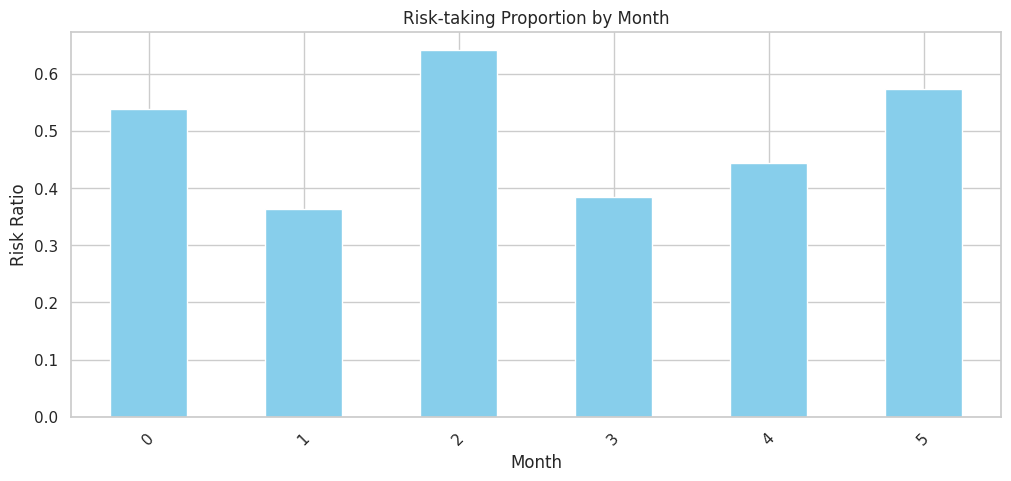

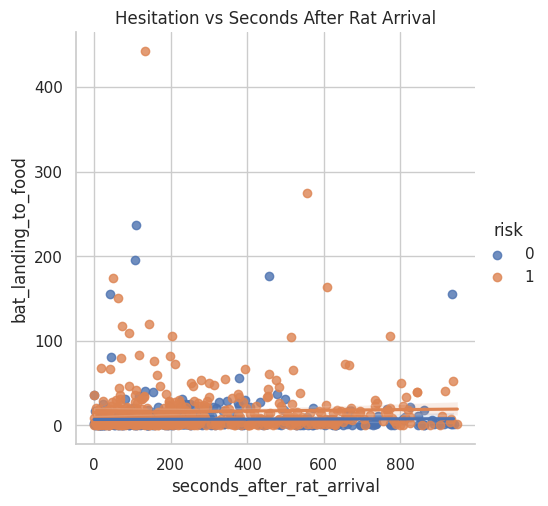

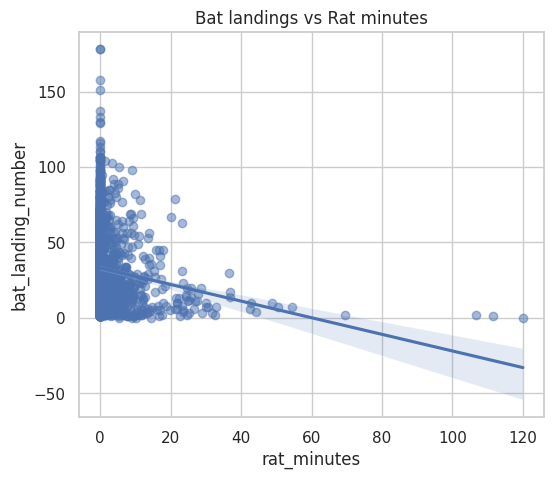

In [ ]:
'''4.This code generates several visualizations to explore
the distribution of 'bat_landing_to_food' and
 its relationship with 'risk', 'habit', and 'season'.'''

sns.set(style="whitegrid")

# Dataset1
# 1. Histogram of hesitation time
# This shows the distribution of how long bats hesitate
# before approaching food after landing.
plt.figure(figsize=(6,6))
sns.histplot(df1['bat_landing_to_food'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of hesitation time")
plt.xlabel("Hesitation time (seconds)")
plt.show()


#2.Boxplot of hesitation by risk
# This compares hesitation times between risk-avoidance (0) and risk-taking (1).
plt.figure(figsize=(6,5))
sns.boxplot(x='risk', y='bat_landing_to_food', data=df1)
plt.title("Hesitation Time by Risk Behavior")
plt.show()

# 3. Barplot of risk-taking proportion by bat behavior
# This shows which bat behaviours are more likely to involve risk-taking
plt.figure(figsize=(10, 6))
habit_risk['risk_ratio'].sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Risk-taking Proportion by Behavior Type')
plt.ylabel('Risk Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Barplot of risk-taking by season
# This shows how the proportion of risk-taking changes across seasons.
sns.barplot(x=season_risk.index, y=season_risk['risk_ratio']*100)
plt.ylabel("Risk-taking proportion (%)")
plt.title("Risk-taking by Season")
plt.show()


# 5.Visualization of monthly risk ratio
plt.figure(figsize=(12, 5))
month_risk['risk_ratio'].plot(kind='bar', color='skyblue')
plt.title('Risk-taking Proportion by Month')
plt.ylabel('Risk Ratio')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()



# 6. Scatterplot with regression: hesitation vs seconds after rat arrival
# This examines whether bats hesitate more/less depending on
# how long after rats arrive they land, separated by risk category.
sns.lmplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', hue='risk', data=df1)
plt.title("Hesitation vs Seconds After Rat Arrival")
plt.show()





# Dataset2
# 7. Scatterplot with regression: bat landings vs rat minutes
# This shows whether longer rat presence reduces the number of bat landings
# in 30-minute observation windows.
plt.figure(figsize=(6,5))
sns.regplot(x='rat_minutes', y='bat_landing_number', data=df2, scatter_kws={'alpha':0.5})
plt.title("Bat landings vs Rat minutes")
plt.show()

‘’‘**The distribution of *bat hesitation times shows* that most bats hesitate for only a few seconds after landing, but a few hesitate for longer.* A box plot of risky behavior categories *shows that risky bats tend to approach food more quickly. *A histogram of behavioral categories  indicates* that certain behaviors, such as fighting, are more likely to be associated with risk-taking. *A histogram of season shows that* bats are more cautious in autumn and winter, while they are more adventurous in warmer seasons. *A scatterplot of bat landing times versus rat arrival times shows* that bats adjust their hesitation behavior based on the presence of rats, with different risk-taking types exhibiting different behaviors. At the group level, *a scatterplot of bat landings versus rat presence time shows* that the longer the rats stay, the fewer bats land ** ‘’’